<a href="https://colab.research.google.com/github/M-Imaduddin-A/Prediksi-Kanker-Paru/blob/main/Lung_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# @title -- 1. Impor Library --
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# import bisa dilakukan di awal sekaligus atau sebelum fungsi yang dilakukan

In [8]:
# @title -- 2. Pengumpulan Data --
# Membuka data dari gdrive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [9]:
#  Lokasi file
%cd /content/drive/My Drive/dataset/
df = pd.read_csv("survey lung cancer.csv")
df.head(5)

/content/drive/My Drive/dataset


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [10]:
# @title -- 3. Menampilkan informasi data --
print("Informasi Umum Data:")
df.info()
print("\nStatistik Deskriptif Data Numerik:")
print(df.describe())

Informasi Umum Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LU

In [12]:
# @title -- 4. Labeling Data --
# Mengubah GENDER menjadi numerik
# Asumsi: M adalah laki-laki, F adalah perempuan
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})
print("\nNilai unik setelah encoding GENDER:")
print(df['GENDER'].unique())


Nilai unik setelah encoding GENDER:
[0 1]


In [13]:
# Mengubah kolom-kolom faktor risiko (1 dan 2) menjadi 0 dan 1
# Asumsi: 1 = No, 2 = Yes. Kita ingin 0 = No, 1 = Yes
# Daftar kolom yang perlu diubah (selain GENDER dan AGE, dan LUNG_CANCER)
binary_cols = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]
for col in binary_cols:
    df[col] = df[col].map({1: 0, 2: 1}) # Mengubah 1 ke 0 dan 2 ke 1
    print(f"Nilai unik setelah encoding {col}: {df[col].unique()}")

# Mengubah kolom target LUNG_CANCER menjadi numerik (NO=0, YES=1)
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO': 0, 'YES': 1})
print("\nNilai unik setelah encoding LUNG_CANCER:")
print(df['LUNG_CANCER'].unique())

Nilai unik setelah encoding SMOKING: [0 1]
Nilai unik setelah encoding YELLOW_FINGERS: [1 0]
Nilai unik setelah encoding ANXIETY: [1 0]
Nilai unik setelah encoding PEER_PRESSURE: [0 1]
Nilai unik setelah encoding CHRONIC DISEASE: [0 1]
Nilai unik setelah encoding FATIGUE : [1 0]
Nilai unik setelah encoding ALLERGY : [0 1]
Nilai unik setelah encoding WHEEZING: [1 0]
Nilai unik setelah encoding ALCOHOL CONSUMING: [1 0]
Nilai unik setelah encoding COUGHING: [1 0]
Nilai unik setelah encoding SHORTNESS OF BREATH: [1 0]
Nilai unik setelah encoding SWALLOWING DIFFICULTY: [1 0]
Nilai unik setelah encoding CHEST PAIN: [1 0]

Nilai unik setelah encoding LUNG_CANCER:
[1 0]


In [15]:
# @title -- 5. Menangani Nilai Hilang --
print("\nJumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())

# Menampilkan beberapa baris data setelah pra-pemrosesan
print("\nData setelah pra-pemrosesan (5 baris pertama):")
print(df.head())
# Menampilkan informasi data setelah pra-pemrosesan
print("\nInformasi Data setelah Pra-pemrosesan:")
df.info()


Jumlah nilai yang hilang di setiap kolom:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Data setelah pra-pemrosesan (5 baris pertama):
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       0   69        0               1        1              0   
1       0   74        1               0        0              0   
2       1   59        0               0        0              1   
3       0   63        1               1        1              0   
4       1   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CON

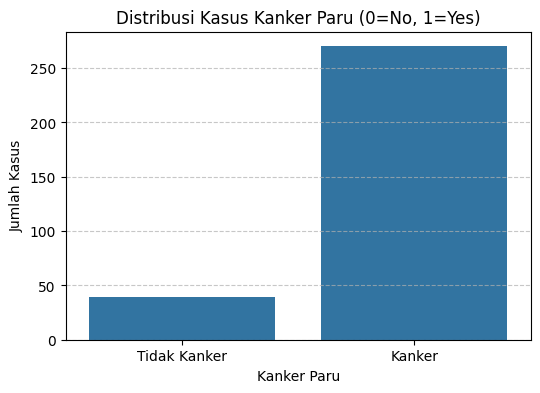

In [20]:
# @title -- 6. Eksplorasi Data (EDA) --

# 1. Distribusi Variabel Target (LUNG_CANCER)
plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Distribusi Kasus Kanker Paru (0=No, 1=Yes)')
plt.xlabel('Kanker Paru')
plt.ylabel('Jumlah Kasus')
plt.xticks(ticks=[0, 1], labels=['Tidak Kanker', 'Kanker'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('lung_cancer_distribution.png')
plt.show()



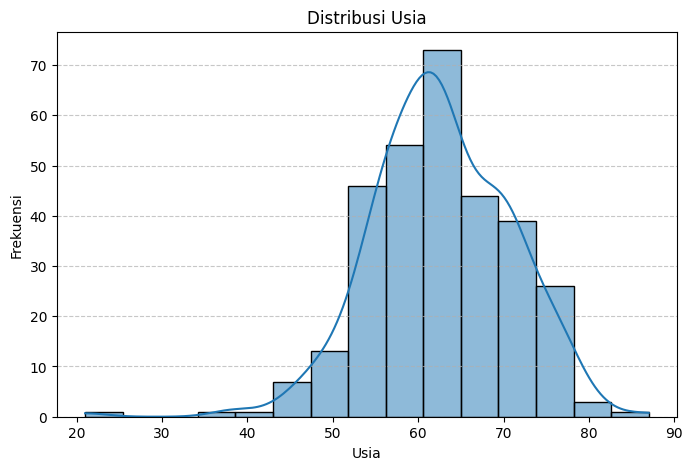

In [21]:
# 2. Distribusi Usia (AGE)
plt.figure(figsize=(8, 5))
sns.histplot(df['AGE'], kde=True, bins=15)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('age_distribution.png')
plt.show()

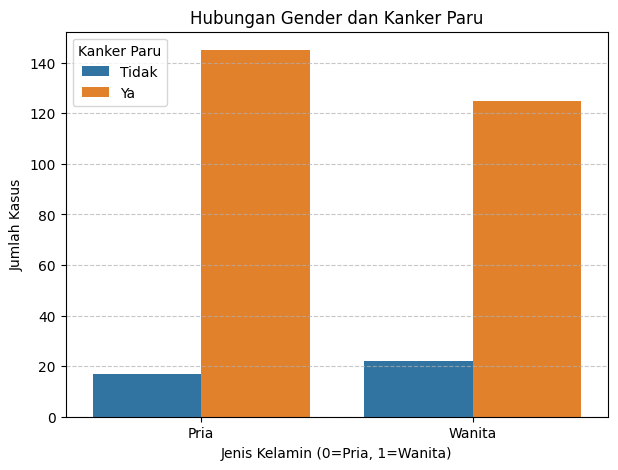

In [22]:
# 3. Hubungan Gender dengan Kanker Paru
plt.figure(figsize=(7, 5))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df)
plt.title('Hubungan Gender dan Kanker Paru')
plt.xlabel('Jenis Kelamin (0=Pria, 1=Wanita)')
plt.ylabel('Jumlah Kasus')
plt.xticks(ticks=[0, 1], labels=['Pria', 'Wanita'])
plt.legend(title='Kanker Paru', labels=['Tidak', 'Ya'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_lung_cancer.png')
plt.show()

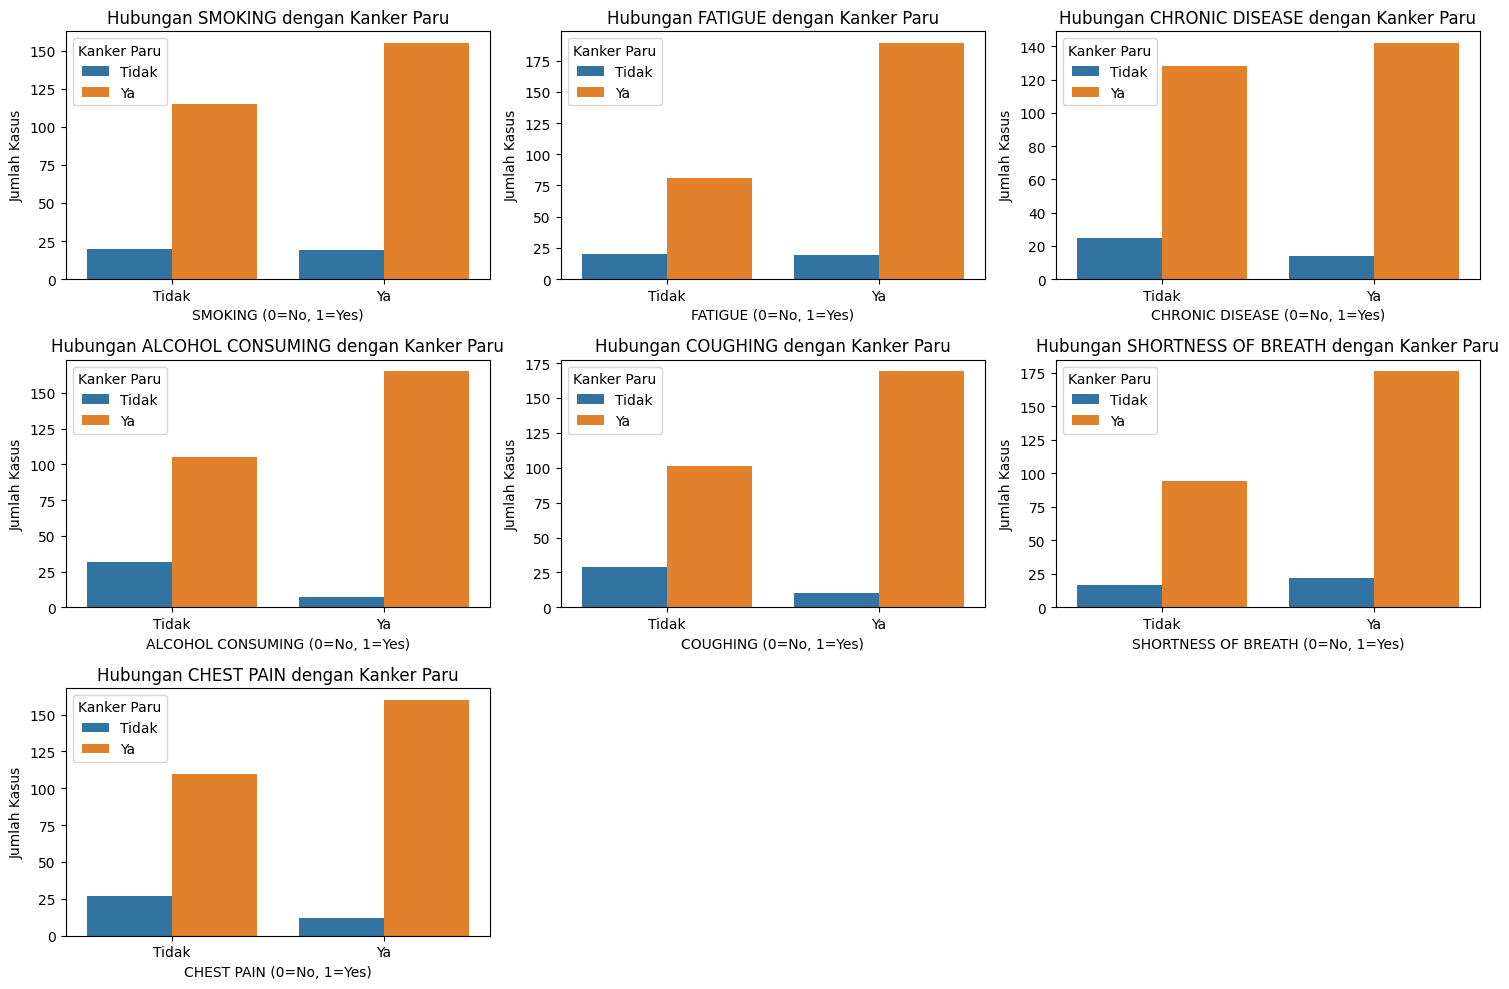

In [23]:
# 4. Hubungan Faktor Risiko/Gejala dengan Kanker Paru
# Memilih beberapa fitur biner kunci untuk visualisasi
eda_features = ['SMOKING', 'FATIGUE ', 'CHRONIC DISEASE', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'CHEST PAIN']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(eda_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=feature, hue='LUNG_CANCER', data=df)
    plt.title(f'Hubungan {feature.replace("_", " ").strip()} dengan Kanker Paru')
    plt.xlabel(f'{feature.replace("_", " ").strip()} (0=No, 1=Yes)')
    plt.ylabel('Jumlah Kasus')
    plt.xticks(ticks=[0, 1], labels=['Tidak', 'Ya'])
    plt.legend(title='Kanker Paru', labels=['Tidak', 'Ya'])
plt.tight_layout()
plt.savefig('risk_factors_lung_cancer.png')
plt.show()

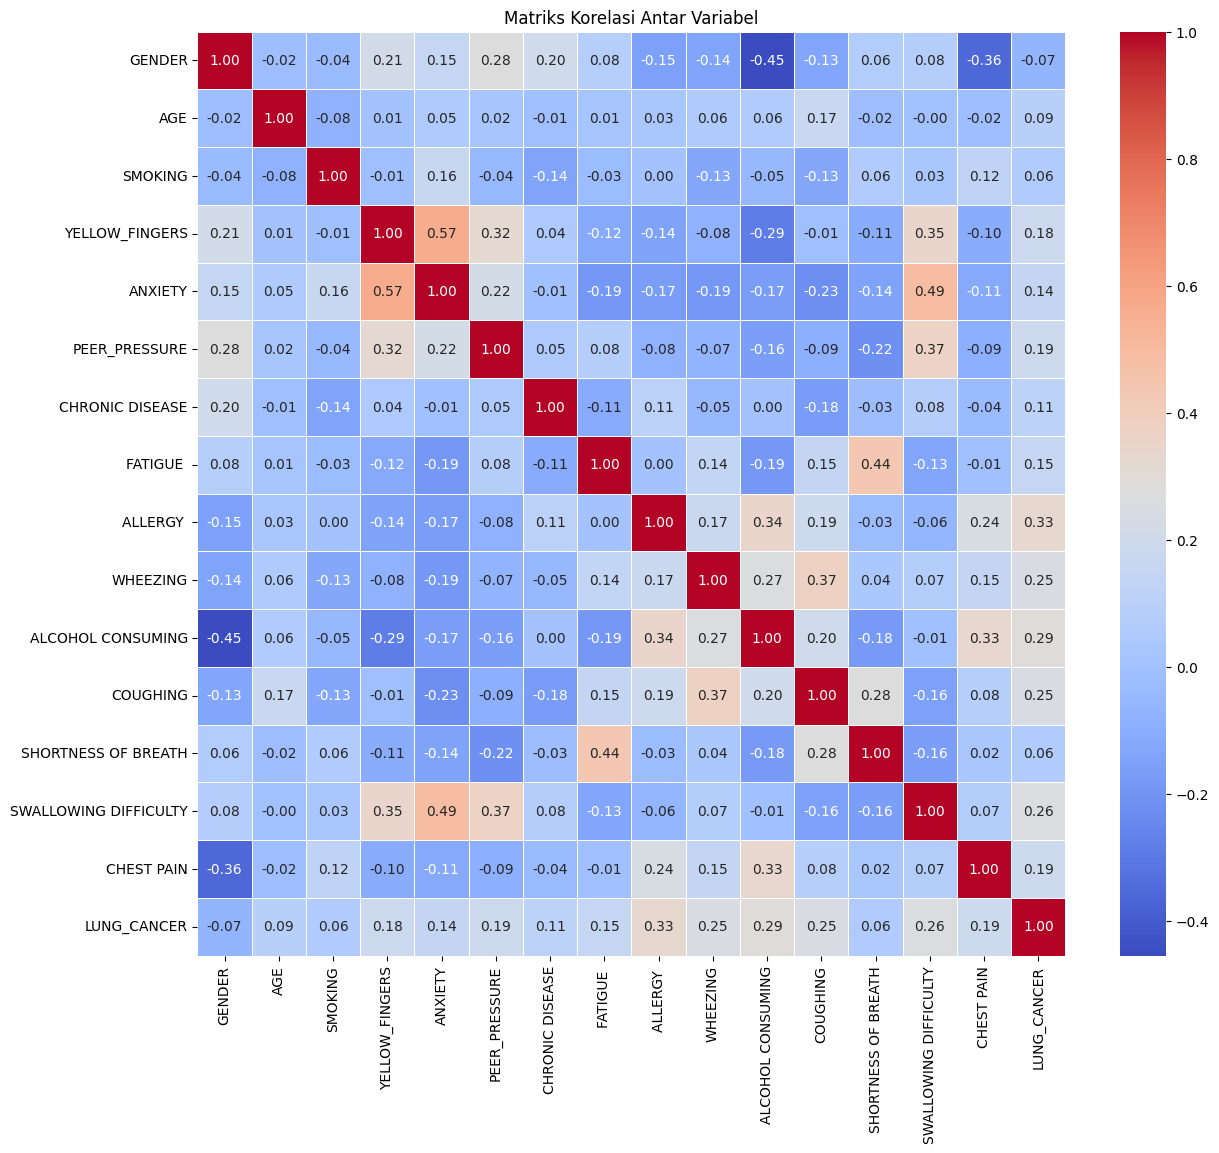


EDA selesai. Anda dapat melihat hasil visualisasi dalam file gambar yang disimpan.
File-file gambar yang dihasilkan: lung_cancer_distribution.png, age_distribution.png, gender_lung_cancer.png, risk_factors_lung_cancer.png, correlation_matrix.png


In [24]:
# 5. Matriks Korelasi
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Antar Variabel')
plt.savefig('correlation_matrix.png')
plt.show()

print("\nEDA selesai. Anda dapat melihat hasil visualisasi dalam file gambar yang disimpan.")
print("File-file gambar yang dihasilkan: lung_cancer_distribution.png, age_distribution.png, gender_lung_cancer.png, risk_factors_lung_cancer.png, correlation_matrix.png")

In [26]:
# @title -- 7. Konstruksi Data --
from sklearn.model_selection import train_test_split
# Mendefinisikan Fitur (X) dan Variabel Target (y)
print("\nMemulai konstruksi data (pemisahan X dan y, serta train-test split)...")

# Hapus kolom target dari fitur
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

print("Variabel Fitur (X) memiliki dimensi:", X.shape)
print("Variabel Target (y) memiliki dimensi:", y.shape)

# Membagi Data menjadi Training dan Testing Sets
# Menggunakan stratify=y untuk memastikan proporsi kelas di training/testing set sama
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nUkuran Training Set (Fitur): {X_train.shape}")
print(f"Ukuran Testing Set (Fitur): {X_test.shape}")
print(f"Ukuran Training Set (Target): {y_train.shape}")
print(f"Ukuran Testing Set (Target): {y_test.shape}")

print("Konstruksi data selesai.")


Memulai konstruksi data (pemisahan X dan y, serta train-test split)...
Variabel Fitur (X) memiliki dimensi: (309, 15)
Variabel Target (y) memiliki dimensi: (309,)

Ukuran Training Set (Fitur): (247, 15)
Ukuran Testing Set (Fitur): (62, 15)
Ukuran Training Set (Target): (247,)
Ukuran Testing Set (Target): (62,)
Konstruksi data selesai.


In [29]:
# @title -- 8. Pembangunan dan Pelatihan Model --
print("\n--- Membangun dan Melatih Model Regresi Logistik ---")
log_reg_model = LogisticRegression(max_iter=1000, random_state=42) # max_iter ditingkatkan untuk konvergensi
log_reg_model.fit(X_train, y_train)
print("Model Regresi Logistik berhasil dilatih.")



--- Membangun dan Melatih Model Regresi Logistik ---
Model Regresi Logistik berhasil dilatih.


In [30]:
# @title -- 9. Evaluasi Model Regresi Logistik --
y_pred_log_reg = log_reg_model.predict(X_test)

print("\nMetrik Evaluasi Regresi Logistik:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Presisi: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.4f}")
print("\nClassification Report (Regresi Logistik):")
print(classification_report(y_test, y_pred_log_reg))


Metrik Evaluasi Regresi Logistik:
Akurasi: 0.9032
Presisi: 0.9286
Recall: 0.9630
F1-Score: 0.9455

Classification Report (Regresi Logistik):
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.93      0.96      0.95        54

    accuracy                           0.90        62
   macro avg       0.80      0.73      0.76        62
weighted avg       0.89      0.90      0.90        62



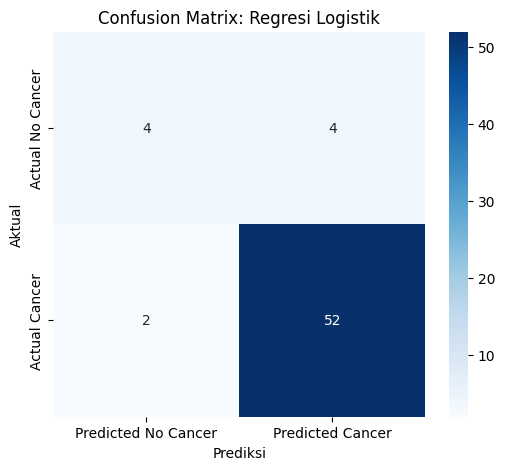

Confusion Matrix Regresi Logistik telah dibuat dan disimpan.

--- Membangun dan Melatih Model Random Forest Classifier ---
Model Random Forest berhasil dilatih.


In [31]:
# Visualisasi Confusion Matrix untuk Regresi Logistik
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Cancer', 'Predicted Cancer'],
            yticklabels=['Actual No Cancer', 'Actual Cancer'])
plt.title('Confusion Matrix: Regresi Logistik')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.savefig('confusion_matrix_logistic_regression.png')
plt.show()
print("Confusion Matrix Regresi Logistik telah dibuat dan disimpan.")

print("\n--- Membangun dan Melatih Model Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators: jumlah pohon
rf_model.fit(X_train, y_train)
print("Model Random Forest berhasil dilatih.")

In [32]:
# @title -- 10. Evaluasi Model Random Forest --
y_pred_rf = rf_model.predict(X_test)

print("\nMetrik Evaluasi Random Forest:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Presisi: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Metrik Evaluasi Random Forest:
Akurasi: 0.9194
Presisi: 0.9623
Recall: 0.9444
F1-Score: 0.9533

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.96      0.94      0.95        54

    accuracy                           0.92        62
   macro avg       0.81      0.85      0.83        62
weighted avg       0.92      0.92      0.92        62



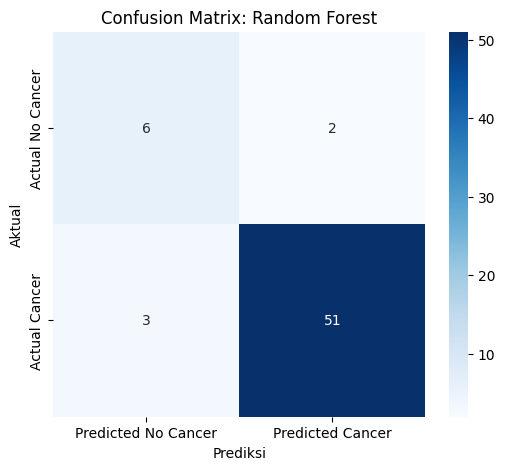

Confusion Matrix Random Forest telah dibuat dan disimpan.


In [33]:
# Visualisasi Confusion Matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Cancer', 'Predicted Cancer'],
            yticklabels=['Actual No Cancer', 'Actual Cancer'])
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.savefig('confusion_matrix_random_forest.png')
plt.show()
print("Confusion Matrix Random Forest telah dibuat dan disimpan.")


--- Analisis Pentingnya Fitur (Feature Importance) dari Model Random Forest ---
                  feature  importance
1                     AGE    0.208062
8                ALLERGY     0.094294
10      ALCOHOL CONSUMING    0.078919
5           PEER_PRESSURE    0.075911
3          YELLOW_FINGERS    0.068735
7                FATIGUE     0.056135
6         CHRONIC DISEASE    0.056016
11               COUGHING    0.054864
9                WHEEZING    0.051668
4                 ANXIETY    0.047041
14             CHEST PAIN    0.046593
12    SHORTNESS OF BREATH    0.044560
0                  GENDER    0.042113
13  SWALLOWING DIFFICULTY    0.039653
2                 SMOKING    0.035438


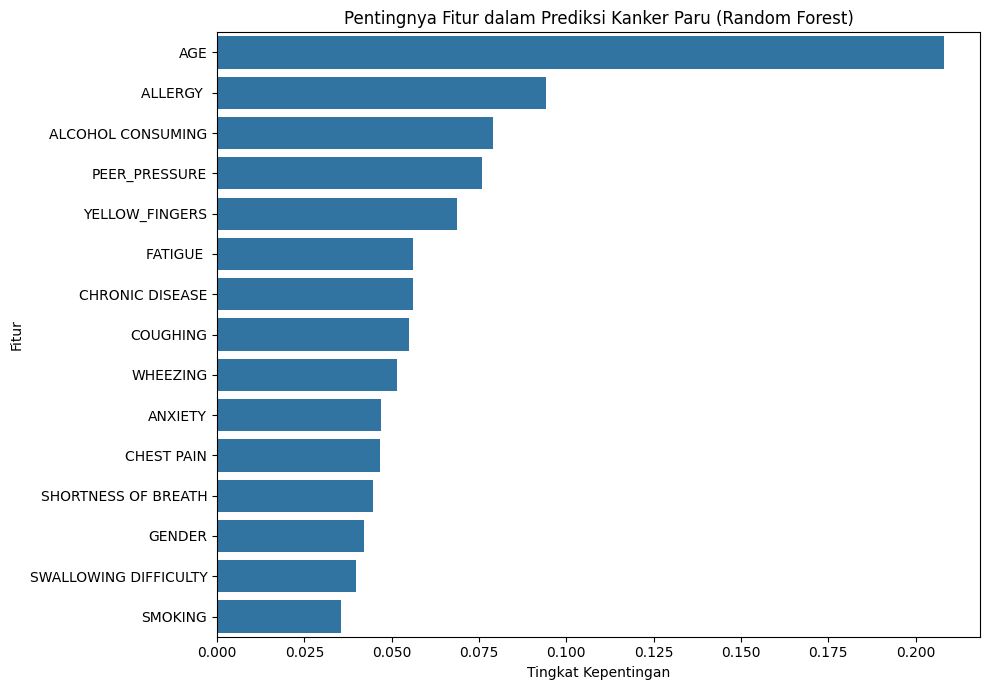

Grafik Feature Importance telah dibuat dan disimpan.

Semua tahap (konstruksi data, pembangunan model, evaluasi, dan analisis fitur) telah selesai.


In [34]:
# @title -- 11. Analisis Pentingnya Fitur (Khusus Random Forest) --
print("\n--- Analisis Pentingnya Fitur (Feature Importance) dari Model Random Forest ---")
feature_importances = pd.DataFrame(
    {'feature': X_train.columns, 'importance': rf_model.feature_importances_}
)
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

# Visualisasi Feature Importance
plt.figure(figsize=(10, 7))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Pentingnya Fitur dalam Prediksi Kanker Paru (Random Forest)')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Fitur')
plt.tight_layout()
plt.savefig('feature_importance_rf.png')
plt.show()
print("Grafik Feature Importance telah dibuat dan disimpan.")

print("\nSemua tahap (konstruksi data, pembangunan model, evaluasi, dan analisis fitur) telah selesai.")

In [35]:
import joblib

# Pastikan log_reg_model dan rf_model sudah dilatih dari kode sebelumnya

# Menyimpan Model Regresi Logistik
filename_lr = 'logistic_regression_model.pkl'
joblib.dump(log_reg_model, filename_lr)
print(f"Model Regresi Logistik berhasil disimpan sebagai '{filename_lr}'")

# Menyimpan Model Random Forest
filename_rf = 'random_forest_model.pkl'
joblib.dump(rf_model, filename_rf)
print(f"Model Random Forest berhasil disimpan sebagai '{filename_rf}'")

print("\nModel-model Anda siap untuk digunakan di Streamlit!")

Model Regresi Logistik berhasil disimpan sebagai 'logistic_regression_model.pkl'
Model Random Forest berhasil disimpan sebagai 'random_forest_model.pkl'

Model-model Anda siap untuk digunakan di Streamlit!
